In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Dataset Info

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.


### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [4]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Checking Missing Values

In [5]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No missing values present in any column in the whole dataset

In [6]:
initial_shape = data.shape
data.info()
data = data.drop_duplicates()
print(f"Shape of dataset before removind duplicates:{initial_shape}\nShape after removing duplicates: {data.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

After analysing shape before and after removel we can come up with a conclusion that there is no dupicate values in the whole dataset

In [7]:
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## Categorical Features

In [8]:
categorical_features = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem']

for col in categorical_features:
    print(f"{col} has following categories: {data[col].unique()}")

fueltype has following categories: ['gas' 'diesel']
aspiration has following categories: ['std' 'turbo']
doornumber has following categories: ['two' 'four']
carbody has following categories: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel has following categories: ['rwd' 'fwd' '4wd']
enginelocation has following categories: ['front' 'rear']
enginetype has following categories: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
fuelsystem has following categories: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [9]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see there are some mismatch and spelling mistake in `CarName` column.

In [10]:
# Create a new dataset with name and price
Car_des = data[['CarName','price']].copy()
Car_des['CarName']= Car_des['CarName'].apply(lambda x: x.split(' ')[0])

def replace_name(x,y):
    Car_des['CarName'].replace(x,y)

replace_name('maxda','mazda')
replace_name('vw','volkswagen')
replace_name('vokswagen','volkswagen')
replace_name('Nissan','nissan')
replace_name('toyouta','toyota')
replace_name('porcshce','porsche')

In [11]:
Car_des['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
Car_des

,CarName,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
200,volvo,16845.0
201,volvo,19045.0
202,volvo,21485.0
203,volvo,22470.0


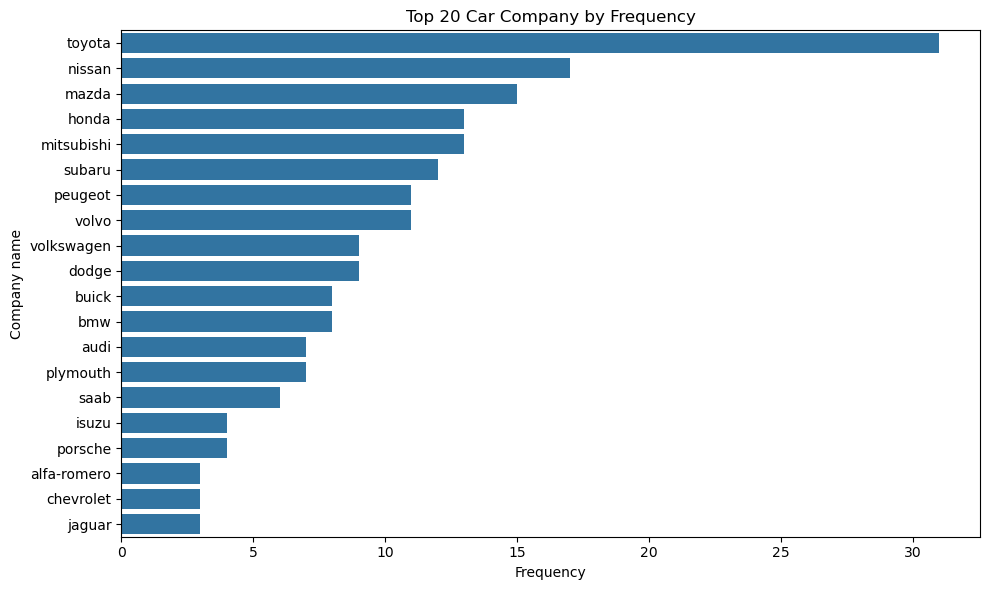

In [13]:
n = 20

top_car_models = Car_des['CarName'].value_counts().head(n)

plt.figure(figsize = (10,6))

sns.barplot(x = top_car_models.values, y = top_car_models.index)

plt.title(f"Top {n} Car Company by Frequency")
plt.xlabel('Frequency')
plt.ylabel('Company name')
plt.tight_layout()
plt.show()


In [14]:
# Convert the categorical value into numerical value which is written into numbers

data['doornumber'] = data['doornumber'].replace({'four':4,'two':2}).astype('int64')

data['cylindernumber'] = data['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}).astype('int64')

## Numerical Features

In [15]:
numerical_features = data.select_dtypes(include = np.number).columns.tolist()
numerical_features

['car_ID',
 'symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

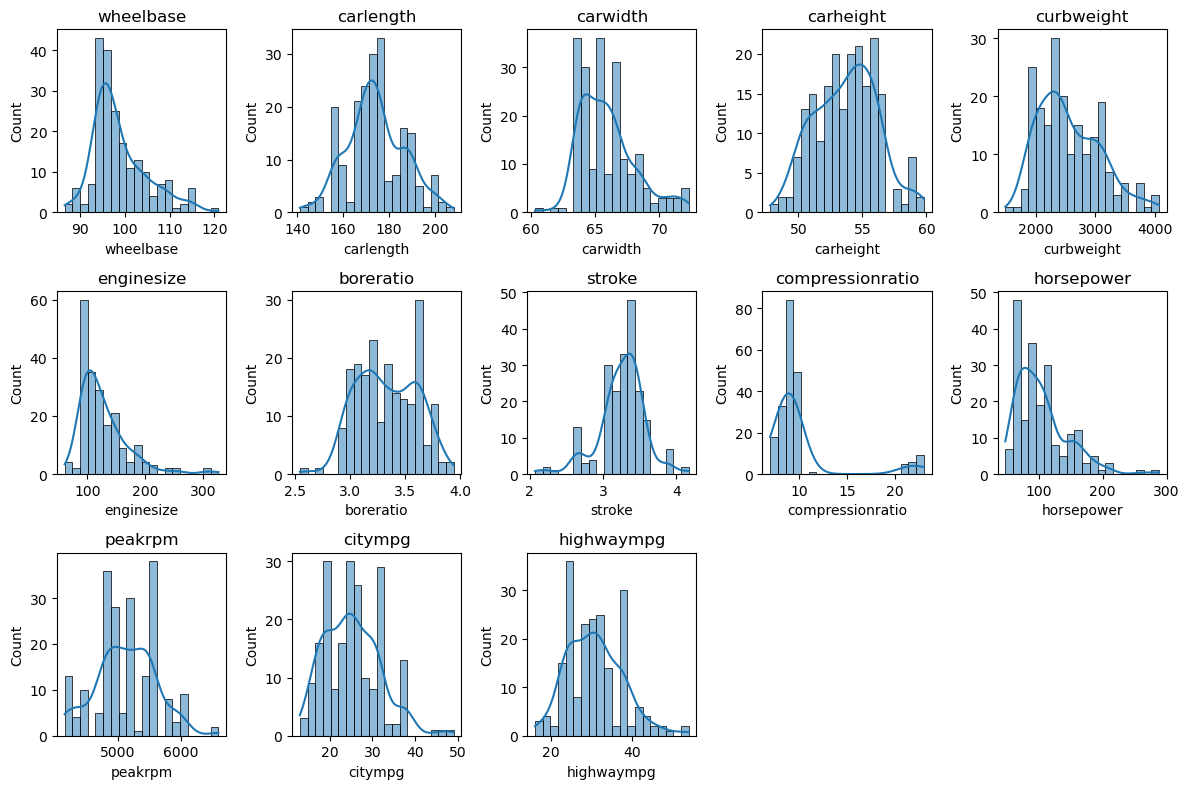

In [16]:
numerical_features_list = ['wheelbase','carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']


plt.figure(figsize = (12,8))

for feature in numerical_features_list:
    plt.subplot(3,5,numerical_features_list.index(feature)+1)
    sns.histplot(data = data[feature],bins = 20,kde = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## Outlier Detection using IQR

In [17]:
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = data[~((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
data.shape,data_no_outliers.shape

((205, 26), (118, 26))

After discarding the outliers from every numerical features, the shape of the dataset has got decreased. The shape of the dataset is now: (118 x 26) which was (205 x 26) before

## Feature Scaling

Scaling is important to keep the values of features in a range of 0 to 1. 


In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_no_outliers[numerical_features_list])
scaled_data = pd.DataFrame(scaled_features,columns=numerical_features_list)
scaled_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.935826,-0.129574,-0.661686,-2.024976,0.595280,1.109423,0.818397,-3.006303,0.066584,0.837773,-0.552729,-1.200956,-1.179004
1,-1.935826,-0.129574,-0.661686,-2.024976,0.595280,1.109423,0.818397,-3.006303,0.066584,0.837773,-0.552729,-1.200956,-1.179004
2,0.568714,0.601185,0.761628,0.247563,0.020433,-0.058440,-0.274122,0.701820,1.860392,0.475511,0.746515,-0.599629,-0.577610
3,0.881781,0.619923,-0.187248,0.247563,0.178448,-0.114053,0.935452,-2.388282,-0.292178,0.435260,1.526062,-0.800071,-0.778075
4,0.881781,0.619923,-0.187248,0.247563,0.178448,-0.114053,0.935452,-2.388282,-0.292178,0.435260,1.526062,-0.800071,-0.778075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1.575002,1.744168,1.439396,1.032622,1.949304,1.109423,1.403675,-0.585723,-2.624128,2.890591,-0.292881,-2.002726,-2.181328
114,1.575002,1.744168,1.439396,1.569767,2.254436,1.109423,1.403675,-0.585723,-2.624128,2.890591,-0.292881,-2.002726,-2.181328
115,2.648376,1.744168,2.591602,0.743390,1.695935,1.721161,2.027971,-0.585723,0.963488,0.958527,0.486666,-0.800071,-0.978540
116,2.648376,1.744168,2.523826,0.743390,1.960201,1.721161,2.027971,-0.585723,-0.471559,2.810088,0.226817,-1.601841,-1.579934


In [20]:
data_scaled_combined = data_no_outliers.copy()

data_scaled_combined[numerical_features_list] = scaled_data

In [21]:
data_scaled_combined.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,-1.935826,...,1.109423,mpfi,0.818397,-3.006303,0.066584,0.837773,-0.552729,-1.200956,-1.179004,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,-1.935826,...,1.109423,mpfi,0.818397,-3.006303,0.066584,0.837773,-0.552729,-1.200956,-1.179004,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,0.881781,...,-0.114053,mpfi,0.935452,-2.388282,-0.292178,0.435260,1.526062,-0.800071,-0.778075,13950.0
10,11,2,bmw 320i,gas,std,2,sedan,rwd,front,-0.795366,...,-1.115078,mpfi,-1.132529,-0.173709,0.784107,-0.893034,0.746515,0.803468,1.026107,16430.0
11,12,0,bmw 320i,gas,std,4,sedan,rwd,front,-0.795366,...,-1.115078,mpfi,-1.132529,-0.173709,0.784107,-0.893034,0.746515,0.803468,1.026107,16925.0


In [22]:
data_scaled_combined.isnull().sum()

car_ID               0
symboling            0
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase           51
carlength           51
carwidth            51
carheight           51
curbweight          51
enginetype           0
cylindernumber       0
enginesize          51
fuelsystem           0
boreratio           51
stroke              51
compressionratio    51
horsepower          51
peakrpm             51
citympg             51
highwaympg          51
price                0
dtype: int64

## EDA

In [23]:
data_scaled_combined.info()
data_scaled_combined.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            118 non-null    int64  
 1   symboling         118 non-null    int64  
 2   CarName           118 non-null    object 
 3   fueltype          118 non-null    object 
 4   aspiration        118 non-null    object 
 5   doornumber        118 non-null    int64  
 6   carbody           118 non-null    object 
 7   drivewheel        118 non-null    object 
 8   enginelocation    118 non-null    object 
 9   wheelbase         67 non-null     float64
 10  carlength         67 non-null     float64
 11  carwidth          67 non-null     float64
 12  carheight         67 non-null     float64
 13  curbweight        67 non-null     float64
 14  enginetype        118 non-null    object 
 15  cylindernumber    118 non-null    int64  
 16  enginesize        67 non-null     float64
 17  fu

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,118.000000,118.000000,118.000000,67.000000,67.000000,67.000000,67.000000,67.000000,118.0,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,118.000000
mean,103.957627,0.788136,3.118644,-0.017036,0.057800,0.009001,-0.061403,-0.019904,4.0,0.088476,0.068892,0.015387,-0.045864,0.008716,-0.199800,-0.028218,-0.012120,9953.711864
std,60.813206,1.168326,0.997171,0.960281,0.903137,0.956629,0.815962,0.918658,0.0,1.007312,0.934830,1.131134,0.834876,0.988217,1.070860,0.926628,0.949879,3953.357830
min,1.000000,-2.000000,2.000000,-1.935826,-1.338138,-2.220553,-2.024976,-1.240961,4.0,-1.115078,-1.366640,-3.006303,-2.624128,-1.134542,-2.631520,-1.601841,-1.780398,5195.000000
25%,46.250000,0.000000,2.000000,-0.616470,-0.457479,-0.729463,-0.702771,-0.863633,4.0,-0.725791,-0.566760,-0.765979,-0.471559,-0.852782,-1.072427,-0.599629,-0.577610,7146.250000
50%,96.500000,1.000000,4.000000,-0.169231,0.001588,-0.187248,0.082288,-0.014984,4.0,-0.002828,-0.274122,-0.173709,0.066584,-0.168510,-0.552729,0.001699,-0.176681,8668.000000
75%,161.750000,1.750000,4.000000,0.345094,0.563711,0.829405,0.330201,0.568036,4.0,0.664523,0.798888,1.010830,0.604726,0.797522,0.746515,0.803468,0.825643,11473.750000
max,205.000000,3.000000,4.000000,3.788836,2.690408,2.591602,2.065594,2.453317,4.0,1.999224,2.027971,1.628850,1.142869,3.413858,2.045759,2.206565,2.830290,22625.000000


## Visualization

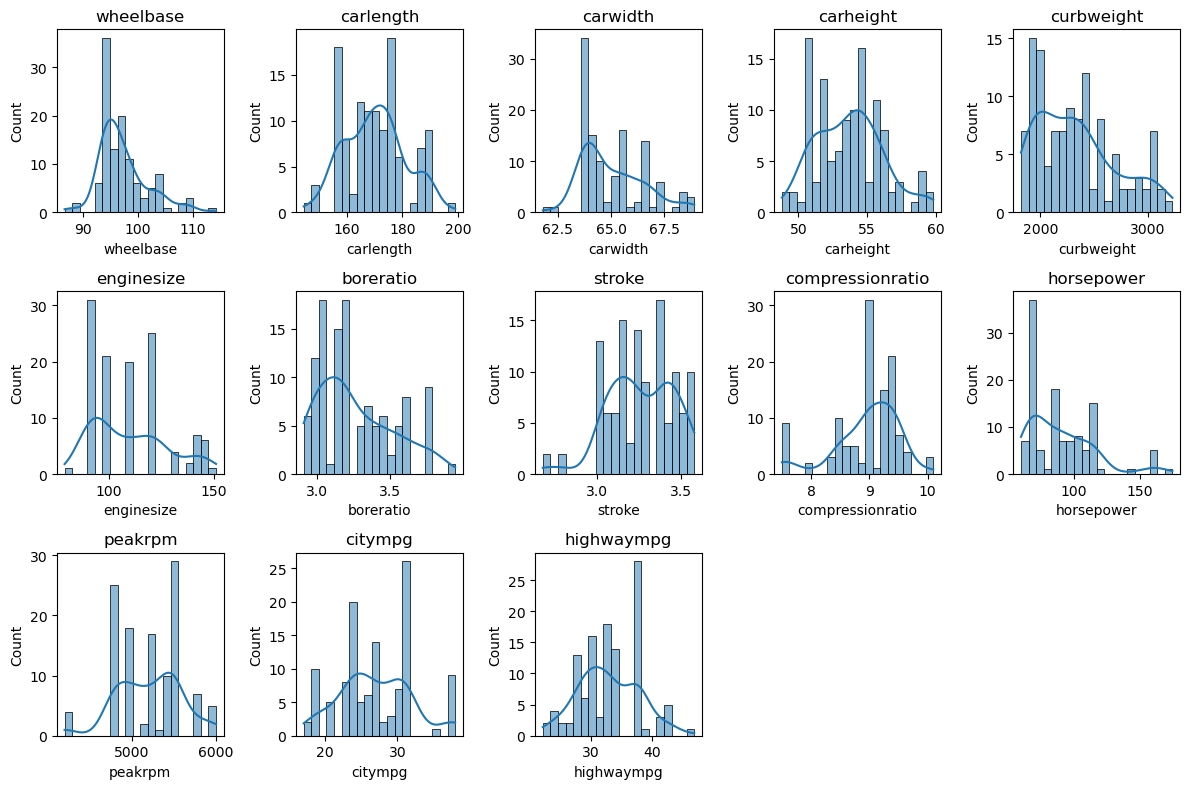

In [24]:
numerical_features_list = ['wheelbase','carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']


plt.figure(figsize = (12,8))

for feature in numerical_features_list:
    plt.subplot(3,5,numerical_features_list.index(feature)+1)
    sns.histplot(data = data_no_outliers[feature],bins = 20,kde = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

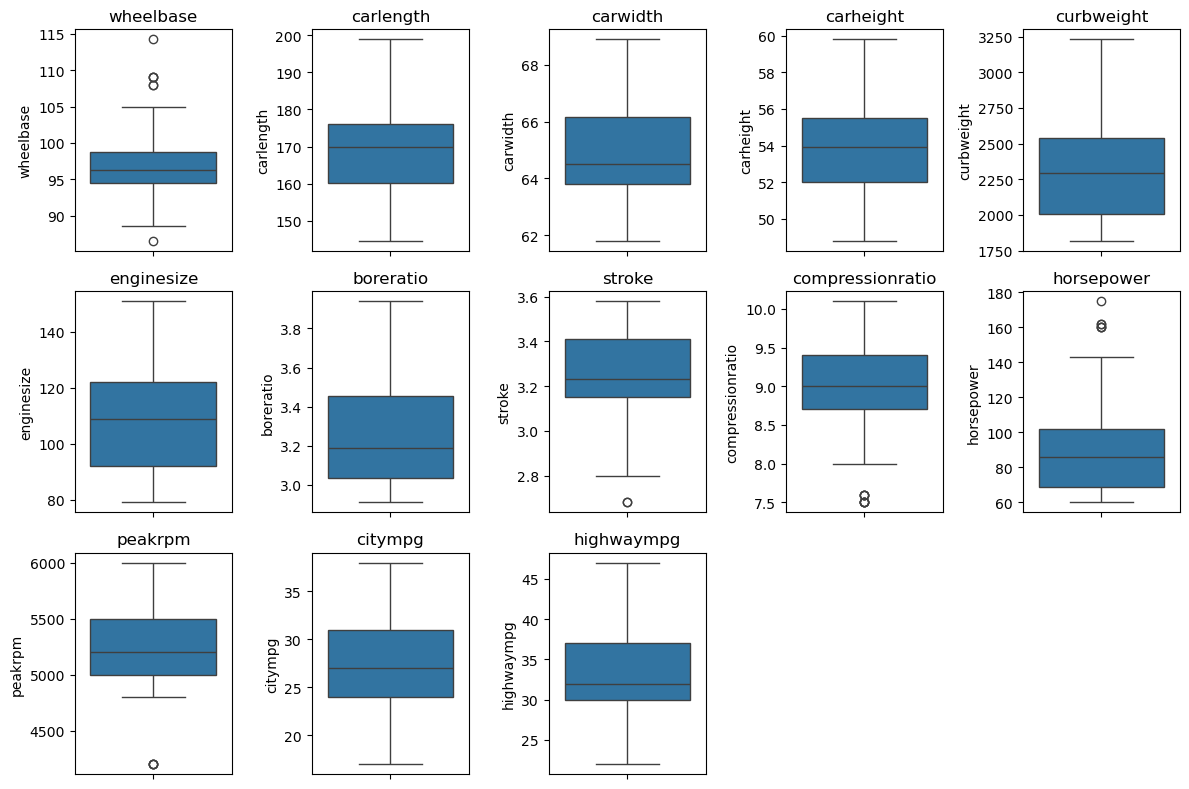

In [25]:
# boxplot of numerical columns

plt.figure(figsize = (12,8))

for feature in numerical_features_list:
    plt.subplot(3,5,numerical_features_list.index(feature)+1)
    sns.boxplot(data = data_no_outliers[feature])
    plt.xticks(rotation=90)
    plt.title(feature)
plt.tight_layout()
plt.show()

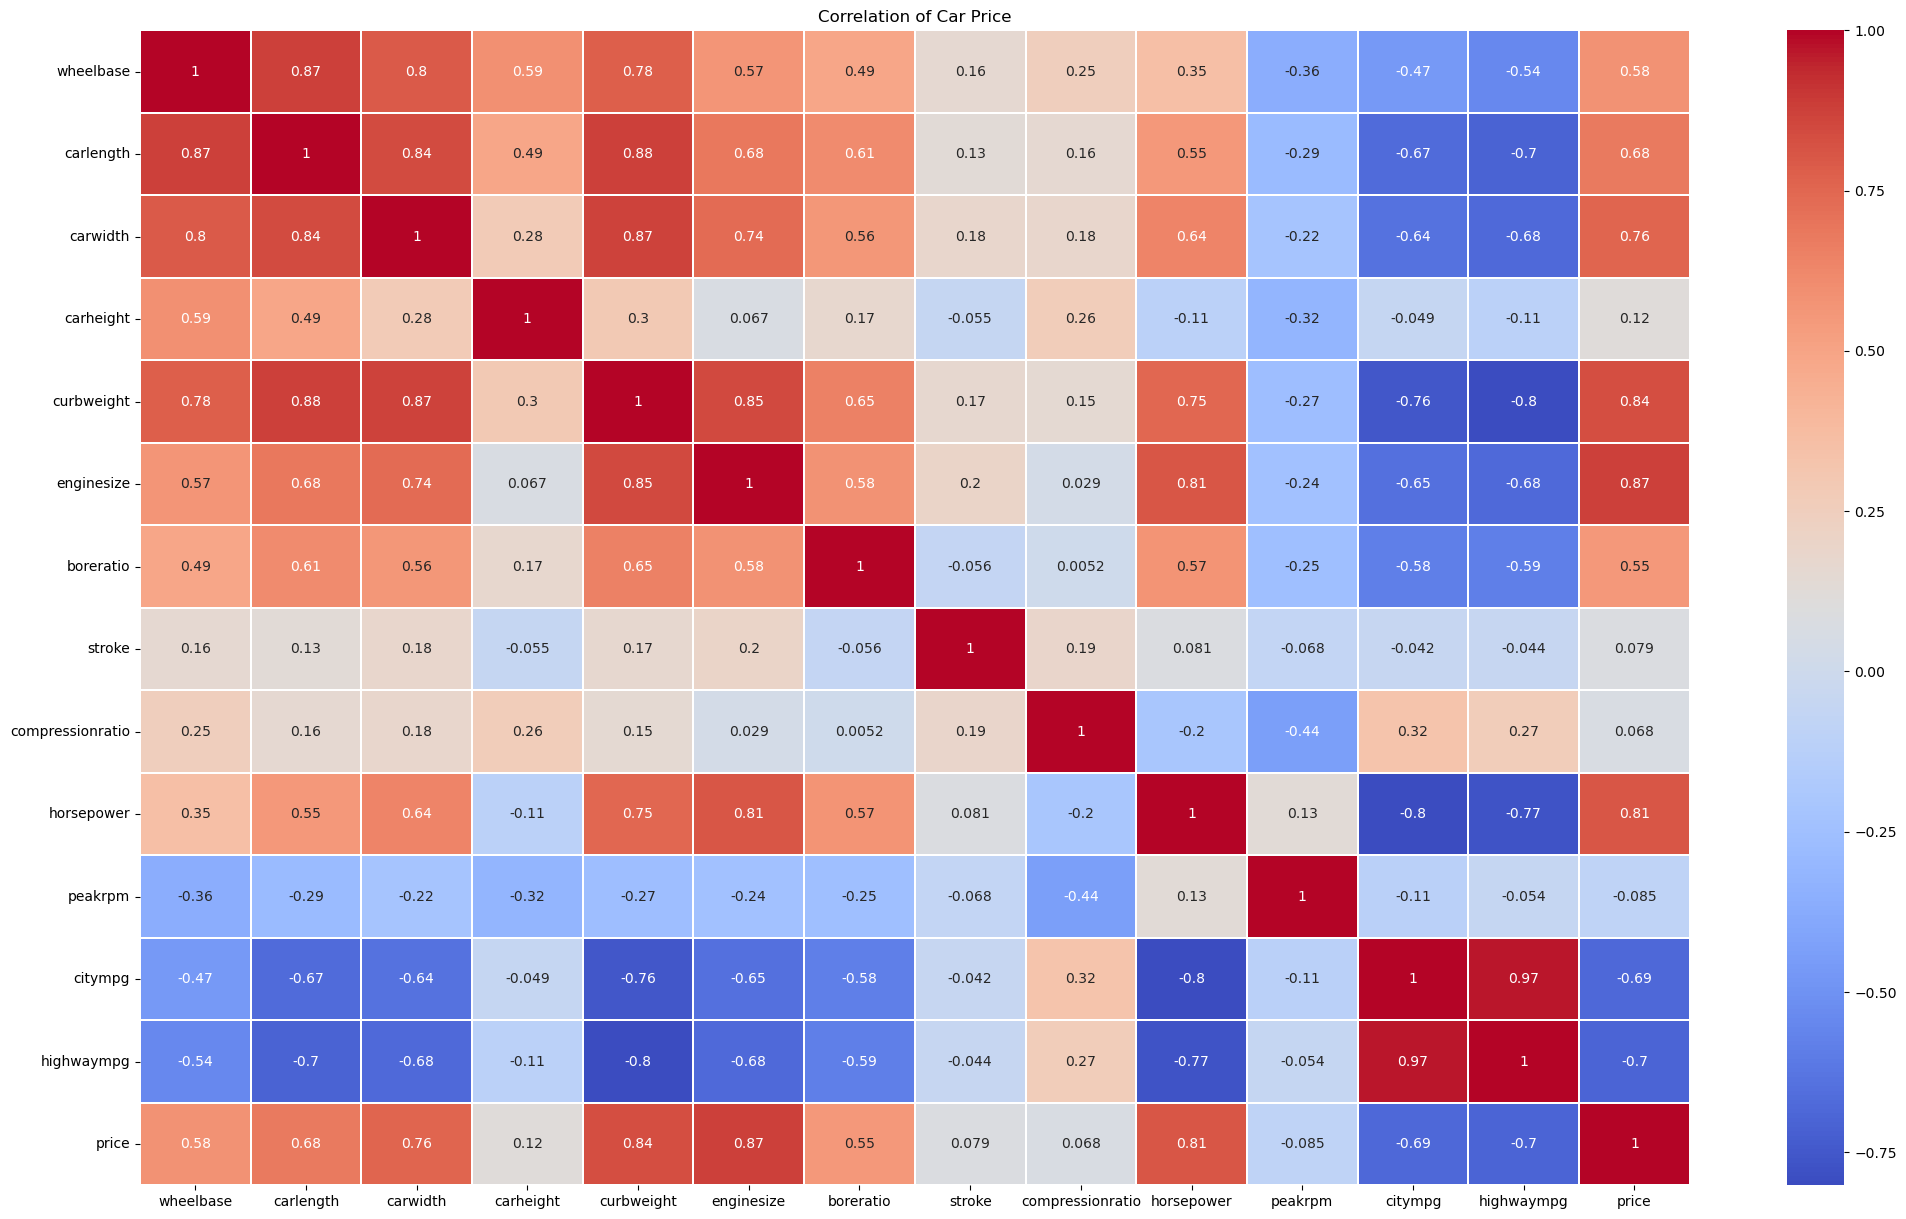

In [26]:
numerical_features_list_w_price = ['wheelbase','carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg','price']
plt.figure(figsize=(25,15))
correlation_ = data[numerical_features_list_w_price].corr()
sns.heatmap(correlation_,annot=True,cmap='coolwarm', linewidths=0.01)
plt.title('Correlation of Car Price')
plt.show()

From this correlation heat map we can clearly see that price is highly related with horsepower, enginesize, curbweight, carwidth, carlength, and wheelbase

## Hypothesis Testing

### `*Hypothesis-1*`:Is there a significant difference in the average price between cars with standard vs turbo aspiration?

📌 Hypotheses:

*`H₀ (null)`*: The mean price of cars with standard aspiration = mean price with turbo aspiration.

*`H₁ (alt)`*: The mean prices are not equal.

In [27]:
import scipy.stats as stats


# Group the prices
std_prices = data_no_outliers[data_no_outliers['aspiration'] == 'std']['price']
turbo_prices = data_no_outliers[data_no_outliers['aspiration'] == 'turbo']['price']

# Run the T-test
t_stat, p_value = stats.ttest_ind(std_prices, turbo_prices, equal_var=False)

# Output results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


T-statistic: -2.9819
P-value: 0.0105
Reject the null hypothesis: Significant difference in prices.


### Hypothesis 2: Is there a relationship between car body type (carbody) and number of doors (doornumber)?

📌 Hypotheses:

*`H₀ (null)`*: Car body type and number of doors are independent (no relationship).

*`H₁ (alt)`*: Car body type and number of doors are dependent (related).



In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['carbody'], data['doornumber'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Car body and door number are dependent.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")


Chi-square Statistic: 116.05820105820106
Degrees of Freedom: 4
P-value: 3.7097788080544754e-24
Reject the null hypothesis: Car body and door number are dependent.


## Linear Regression Modeling

In [29]:
data_scaled_combined.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Load and prepare data
data_clean = data_no_outliers.copy()

# Define variables
X = data_clean[['enginesize']]
y = data_clean['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

# Predictions
y_pred = lr_simple.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Simple Linear Regression")
print(f"Regression Equation: price = {lr_simple.intercept_:.2f} + {lr_simple.coef_[0]:.2f} * enginesize")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


Simple Linear Regression
Regression Equation: price = -7187.84 + 155.00 * enginesize
R² Score: 0.6840
RMSE: 2631.00


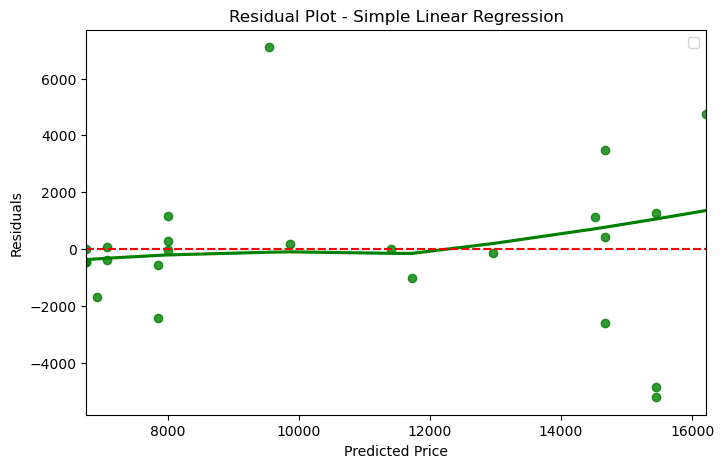

In [31]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot - Simple Linear Regression")
plt.legend()
plt.show()


In [32]:
data_scaled_combined.isnull().sum()

car_ID               0
symboling            0
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase           51
carlength           51
carwidth            51
carheight           51
curbweight          51
enginetype           0
cylindernumber       0
enginesize          51
fuelsystem           0
boreratio           51
stroke              51
compressionratio    51
horsepower          51
peakrpm             51
citympg             51
highwaympg          51
price                0
dtype: int64

## Multiple LinearRegression

In [33]:
features = ['enginesize', 'curbweight', 'horsepower', 'carwidth']
X = data_clean[features]
y = data_clean['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

# Predictions
y_pred_multi = lr_multiple.predict(X_test)

# Evaluation
r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print("Multiple Linear Regression")
print("Regression Equation: price = {:.2f}".format(lr_multiple.intercept_), end=' ')
for feat, coef in zip(features, lr_multiple.coef_):
    print(f"+ ({coef:.2f} * {feat})", end=' ')
print()
print(f"R² Score: {r2_multi:.4f}")
print(f"RMSE: {rmse_multi:.2f}")


Multiple Linear Regression
Regression Equation: price = -38197.57 + (-31.97 * enginesize) + (4.57 * curbweight) + (72.17 * horsepower) + (528.81 * carwidth) 
R² Score: 0.7651
RMSE: 2268.29


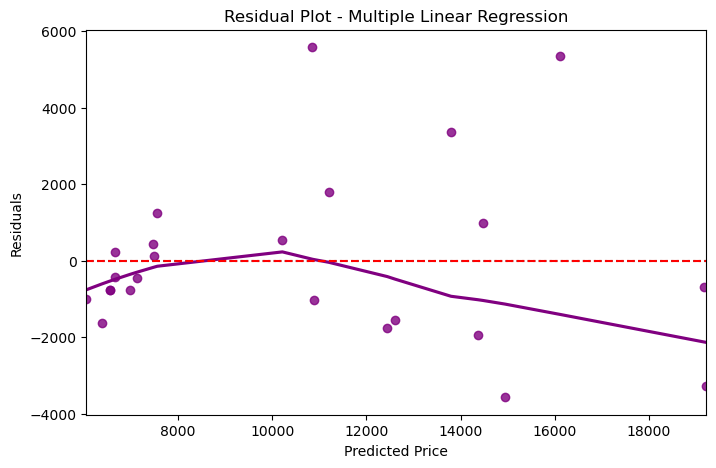

In [34]:
residuals_multi = y_test - y_pred_multi

plt.figure(figsize=(8,5))
sns.residplot(x=y_pred_multi, y=residuals_multi, lowess=True, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot - Multiple Linear Regression")
plt.show()


*`Simple Linear Regression:`*

* Equation:
price = intercept + coef × enginesize

* Interpretation: For each unit increase in engine size, car price increases by approximately coef units.

* R² Score: Shows how much of the variance in price is explained by engine size alone.

* Residuals: Should be randomly scattered around 0 for a good fit.

*`Multiple Linear Regression:`*
* Equation:
price = intercept + (coef₁ × enginesize) + (coef₂ × curbweight) + ...

* Interpretation: Each coefficient shows how much the price changes per unit increase of that feature, holding others constant.

* R² Score: Higher than simple model → better explanation of price variability.

* RMSE: Lower RMSE indicates better predictions.

* Residual Plot: Should not show patterns (non-random patterns suggest non-linearities or missing variables).